In [ ]:
load_dotenv()
OPEANI_API_KEY=os.getenv("OPEANI_API_KEY")
print(OPEANI_API_KEY)
MODEL="gpt-3.5-turbo"


In [ ]:
from langchain.chat_models import ChatOpenAI
from langchain_community.llms import Ollama
from langchain.schema import HumanMessage, SystemMessage, AIMessage
if model.startswith("gpt-3.5"):
  model=ChatOpenAI(api_key=OPEANI_API_KEY,model_name=MODEL)
  model.invoke("Tell me a funny joke")
else:
  model=Ollama(base_url="http://localhost:11434",model=MODEL)
model=ChatOpenAI(openai_api_key=OPEANI_API_KEY,mblob:https://colab.research.google.com/cb6d1ef4-ce88-4e35-890b-dd1b982b2341odel_name=MODEL)
model.invoke("Tell me a hilarious joke")

In [ ]:
## setup rag system

In [ ]:
import os
from dotenv import load_dotenv
load_dotenv()
OPEANI_API_KEY=os.getenv("OPEANI_API_KEY")
print(OPEANI_API_KEY)
MODEL="gpt-3.5-turbo"
import faiss
import numpy as np

In [ ]:
docs=["Paris is the capital and most populous city of France. The city is framed for the Eiffel Tower","Mike loves the pink color morethan any other color"]

In [ ]:
client=openai.client()


In [ ]:
def get_embeddings(text):
  response=client.embeddings.create(model="text-embedding-3-small",input=text)
  return resposnse["data"][0]["embedding"]

In [ ]:
embeddings=np.array([get_embeddings(doc) for doc in docs])
index=faiss.IndexFlatL2(embeddings.shape[1])
faiss.normalize_L2(embeddings)
index.add(embeddings)

In [ ]:
def retrieve(query,k):
  query_embedding=np.array(get_embeddings(query))
  faiss.normalize_L2(query_embedding)
  _,idx=index.search(np.array([query_embedding]),k)
  return [docs[i] for i in idx[0]

In [ ]:
def generate_answer(question,context):
  query_embedding=np.np.array([get_embeddings(query)]).astype('float32')
  faiss.normalize

In [ ]:
## Evaluate RAG systems with RAGAS

In [ ]:
from datasets import Dataset
question=["what is the capital of France","What is Mikes favourite color"]
ground_truths=["Paris","Pink"]
rows=[]
for question,ground_truth in zip(questions,ground_truth):
  context=retrieve(question,3)
  answer=generate_answer(question,context)
  rows.append({"question":question,"context":context,"answer":answer,"ground_truth":ground_truth})
evaluation_dataset=Dataset.from_list(rows)


In [ ]:
from inspect import classify_class_attrs
from ragas import Evaulate
from ragas.metrics import(answer_correctness,answer_relevance,answer_quality,answer_time,context_precision,context_recall,faithfulness)
scores=Evaulate(evaluation_dataset,[answer_correctness,answer_relevance,answer_quality,answer_time,context_precision,context_recall])
print(rows)
print(scores)


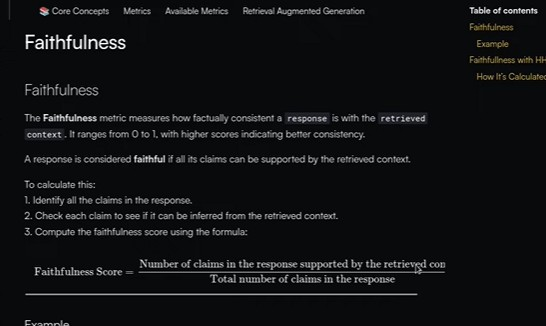

In [2]:
from IPython.core.display import Image
from PIL import Image
Image.open(r'/content/faithfulness.jpg')

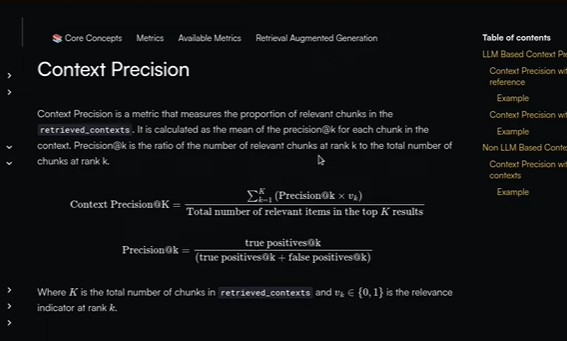

In [3]:
from IPython.core.display import Image
from PIL import Image
Image.open(r'/content/context_precision.jpg')

In [ ]:
context=['Vienna is the capital of Austria']
question=questions[-1]
answer=generate_answer(question,context)
rows.append({"question":question,"context":context,"answer":answer,"ground_truth":ground_truth})
evaluation_dataset=Dataset.from_list(rows)
scores=Evaulate(evaluation_dataset,[answer_correctness,answer_relevance,answer_quality,answer_time,context_precision,context_recall])
print(rows)
print(scores)

In [ ]:
## ollama list in cli

In [ ]:
## Ollama Integration

In [ ]:

from ragas import evaluate_forward_ref
from ragas.llms import LangchainLLMWrapper
from ragas.embeddings import LangChainEmbeddings
from langchain_ollama.chat_models import ChatOllama
from langchain_community.embeddings import HuggingFaceBgeEmbeddings

In [ ]:
llm=ChatOllama(model="qwen3:4b",temperature=0)
ragas_llm=LangchainLLMWrapper(llm)
emb=HuggingFaceBgeEmbeddings(model_name="BAAI/bge-small-en-v1.5")
ragas_emb=LangChainEmbeddings(emb)
scores=Evaulate(evaluation_dataset,metrics=[answer_correctness,answer_relevance,answer_quality,answer_time,context_precision,context_recall],llm=ragas_llm,embeddings=  ragas_emb)
print(rows)
print(scores)